In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 20
import warnings
import itertools
warnings.filterwarnings("ignore")
from datetime import datetime, date, timedelta
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df = pd.read_csv("Data/MER_T12_06.csv")
df.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLEIEUS,197301,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,197302,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,197303,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,197304,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,197305,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           5094 non-null   object
 1   YYYYMM        5094 non-null   int64 
 2   Value         5094 non-null   object
 3   Column_Order  5094 non-null   int64 
 4   Description   5094 non-null   object
 5   Unit          5094 non-null   object
dtypes: int64(2), object(4)
memory usage: 238.9+ KB


In [4]:
dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce') #coerce to have a NaN field in empty or corrupted
df = pd.read_csv("Data/MER_T12_06.csv", parse_dates=['YYYYMM'], index_col='YYYYMM', date_parser=dateparse) 
df.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [5]:
ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]
ts.head(15)

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-06-01,CLEIEUS,66.538,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-07-01,CLEIEUS,72.626,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-08-01,CLEIEUS,75.181,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-09-01,CLEIEUS,68.397,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [6]:
ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]
ts.head(15)

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-06-01,CLEIEUS,66.538,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-07-01,CLEIEUS,72.626,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-08-01,CLEIEUS,75.181,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-09-01,CLEIEUS,68.397,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [7]:
ts['Value'] = pd.to_numeric(ts['Value'] , errors='coerce')
ts.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [8]:
ts.dropna(inplace = True)

In [9]:
sources=ts[ts['Description']=='Natural Gas Electric Power Sector CO2 Emissions']
co2_emissions=sources['Value']
sources

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,NNEIEUS,12.175,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,NNEIEUS,11.708,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,NNEIEUS,13.994,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,NNEIEUS,14.627,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,NNEIEUS,17.344,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
...,...,...,...,...,...
2016-03-01,NNEIEUS,40.525,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2016-04-01,NNEIEUS,39.763,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2016-05-01,NNEIEUS,44.210,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [10]:
start_date=datetime(1973,1,1)
end_date=datetime(2016,1,1)
lim_co2_emissions=co2_emissions[start_date:end_date]

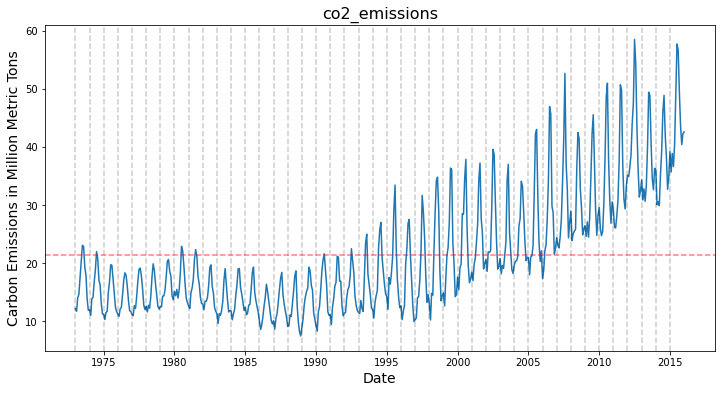

In [11]:
plt.figure(figsize=(12,6))
plt.plot(lim_co2_emissions)
plt.title('co2_emissions',fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Carbon Emissions in Million Metric Tons',fontsize=14)
for year in range(1973,2016):
    plt.axvline(pd.to_datetime(str(year)),color='k',linestyle='--',alpha=0.2)
plt.axhline(lim_co2_emissions.mean(),color='r',linestyle='--',alpha=0.5)

#### Nhận xét: từ năm 1975 - 2016 giá trị dữ liệu có chiều hướng tăng lên theo thời gian, do đó biểu đồ này không phải là stationary

### Remove the trend

In [12]:
first_diff = lim_co2_emissions.diff()[1:]

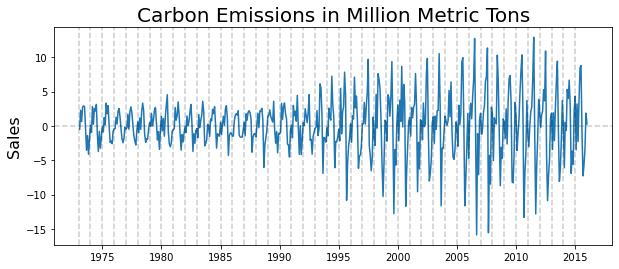

In [13]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('Carbon Emissions in Million Metric Tons', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)

### ACF

<BarContainer object of 15 artists>

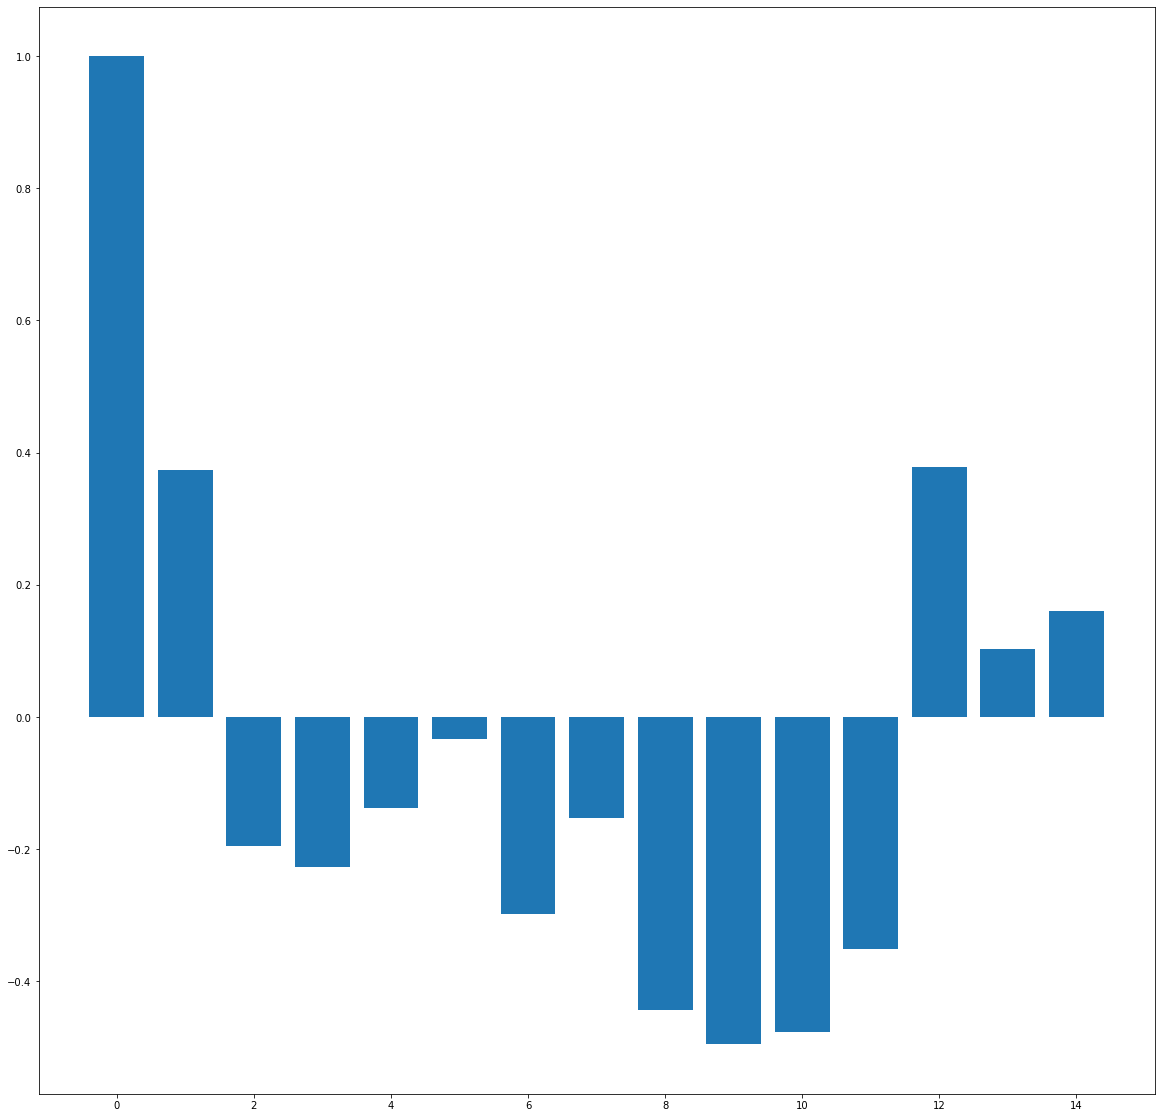

In [14]:
pacf_vals = pacf(first_diff)
num_lags = 15
plt.bar(range(num_lags), pacf_vals[:num_lags])

#### Dựa vào đồ thị chúng ta chọn MA(4)

<BarContainer object of 15 artists>

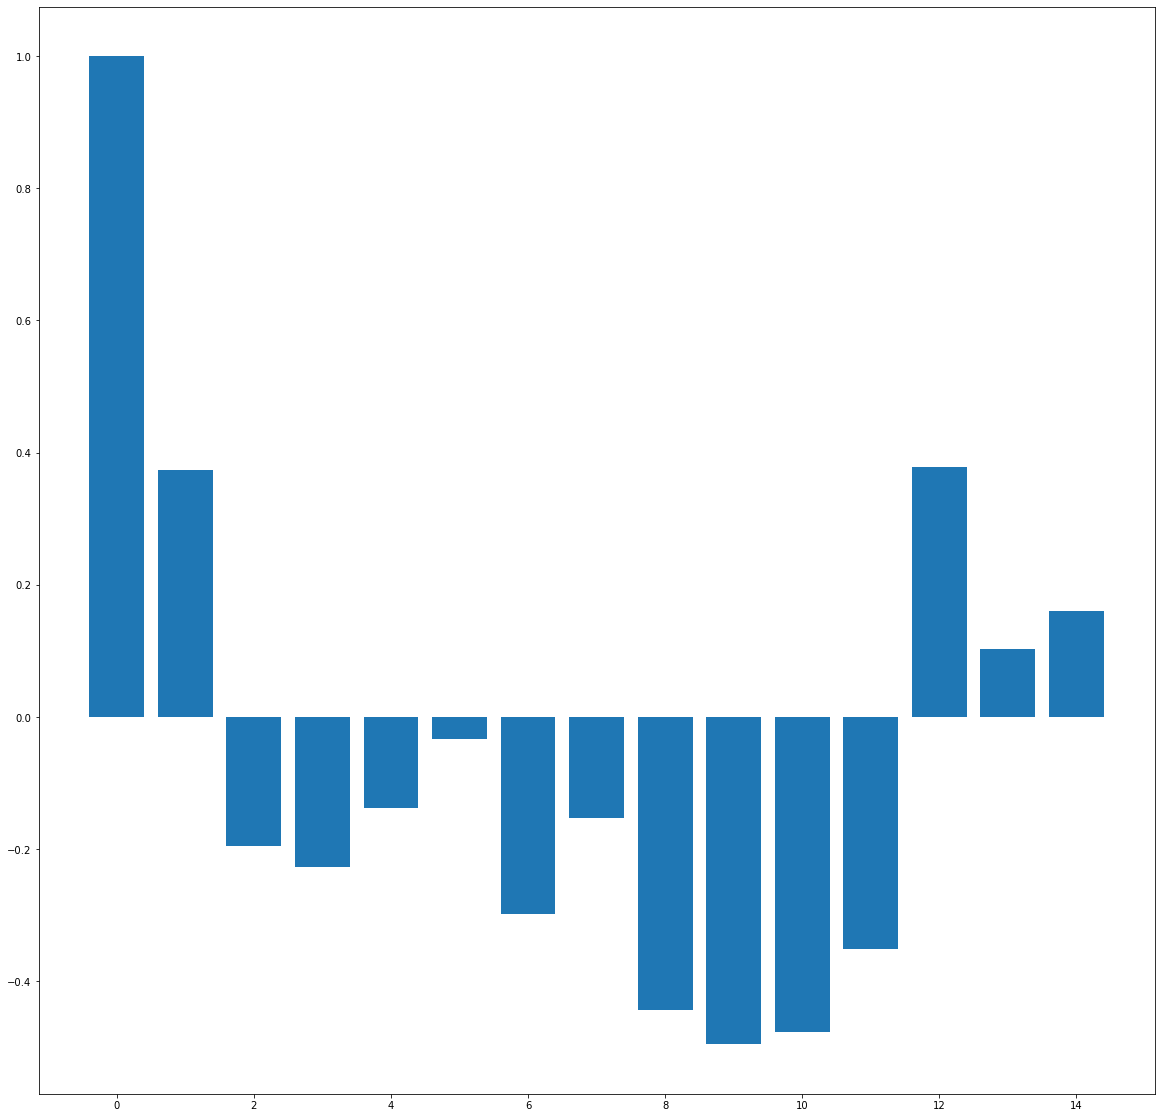

In [15]:
pacf_vals = pacf(first_diff)
num_lags = 15
plt.bar(range(num_lags), pacf_vals[:num_lags])

#### Dựa vào đồ thị chúng ta chọn AR(4)

### Train test split

In [16]:
train_end = datetime(2013,1,1)
test_end = datetime(2016,1,1)
train_data = lim_co2_emissions[:train_end]
test_data = lim_co2_emissions[train_end + timedelta(days=1):test_end]

In [17]:
#AR=4, I=0, MA=4
model=ARIMA(train_data,order=(4,0,4))

C:\Users\PMinhQuang\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PMinhQuang\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PMinhQuang\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [18]:
import time
start = time.time()
model_fit = model.fit()
end = time.time()
print('Model Fitting Time:', end - start)

Model Fitting Time: 0.9988460540771484


C:\Users\PMinhQuang\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [19]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  481
Model:                 ARIMA(4, 0, 4)   Log Likelihood               -1187.089
Date:                Wed, 05 Oct 2022   AIC                           2394.179
Time:                        11:28:05   BIC                           2435.937
Sample:                    01-01-1973   HQIC                          2410.592
                         - 01-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.4878    149.917      0.163      0.870    -269.344     318.320
ar.L1          1.6676      0.022     77.094      0.000       1.625       1.710
ar.L2          0.0275      0.048      0.579      0.5

In [20]:
predictions = model_fit.forecast(len(test_data))
predictions = pd.Series(predictions, index=test_data.index)
residuals = test_data - predictions

Text(0, 0.5, 'Error')

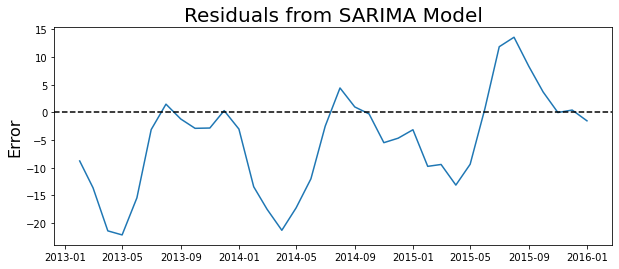

In [21]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

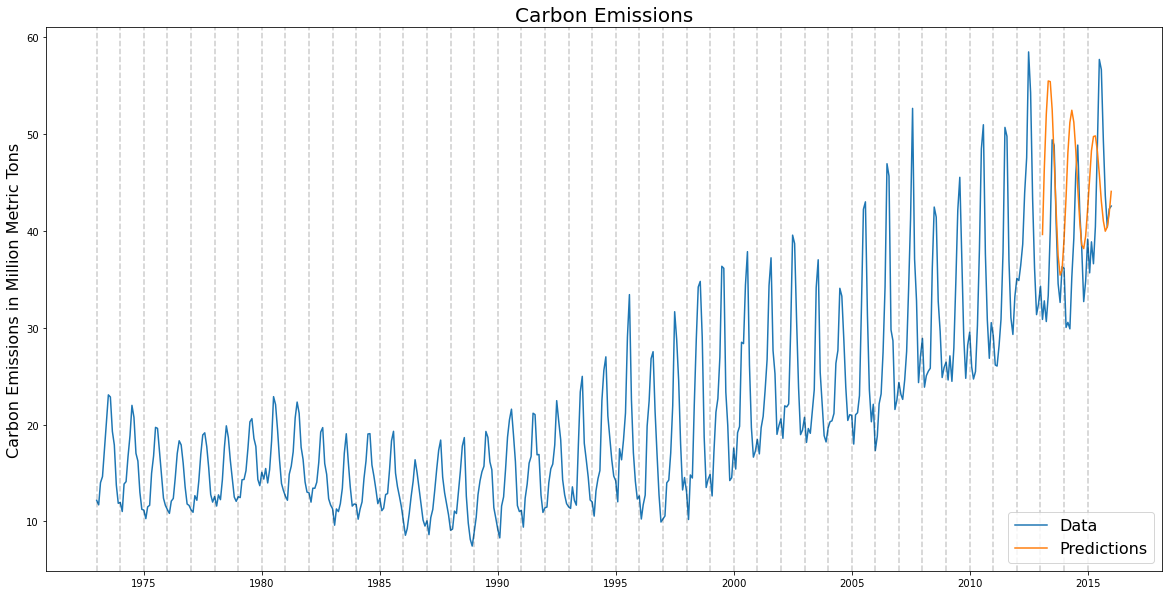

In [22]:
plt.figure(figsize=(20,10))
plt.plot(lim_co2_emissions)
plt.plot(predictions)
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title('Carbon Emissions', fontsize=20)
plt.ylabel('Carbon Emissions in Million Metric Tons', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [23]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))

Mean Absolute Percent Error: 0.2163


In [24]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 10.29874433665366


### Dự đoán 36 tháng tiếp theo

In [25]:
import pmdarima
stepwise_model = pmdarima.arima.auto_arima(train_data , start_p=2, start_q= 2,
max_p=5, max_q=5, m=12,
start_P=1, seasonal=True,
d=1, D=1, trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1874.197, Time=1.51 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2135.202, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1992.242, Time=0.25 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1910.716, Time=0.30 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1872.291, Time=1.29 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=inf, Time=0.72 sec
 ARIMA(2,1,2)(0,1,2)[12]             : AIC=1874.188, Time=2.22 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=inf, Time=2.32 sec
 ARIMA(2,1,2)(1,1,2)[12]             : AIC=1876.151, Time=2.84 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=1870.441, Time=1.06 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=2032.549, Time=0.47 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=1872.413, Time=1.17 sec
 ARIMA(1,1,2)(0,1,2)[12]             : AIC=1872.410, Time=1.93 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=1935.682, Time=0.82 sec
 ARIMA(1,1,2)(1,1,2)[12]     

In [26]:
future_forecast = stepwise_model.predict(n_periods=len(test_data)+36)

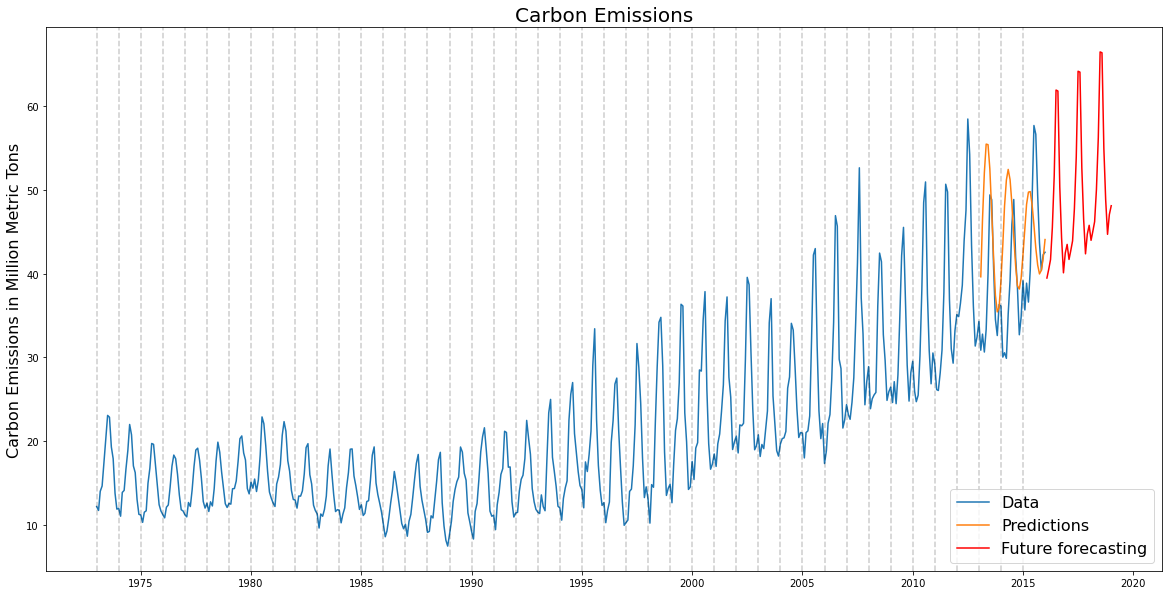

In [28]:
plt.figure(figsize=(20,10))
plt.plot(lim_co2_emissions)
plt.plot(predictions)
plt.plot(future_forecast[len(test_data):], color='red')
plt.legend(('Data', 'Predictions','Future forecasting'), fontsize=16)
plt.title('Carbon Emissions', fontsize=20)
plt.ylabel('Carbon Emissions in Million Metric Tons', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)